<a href="https://colab.research.google.com/github/HYUNMIN-HWANG/Colab/blob/main/YOLOv5/03_yolov5_3_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# yolov5 클론
%cd /content/
# %cd : 해당 폴더로 이동 
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 4894 (delta 1), reused 0 (delta 0), pack-reused 4887
Receiving objects: 100% (4894/4894), 7.83 MiB | 2.86 MiB/s, done.
Resolving deltas: 100% (3340/3340), done.


In [2]:
# yolov5에 필요한 패키지 설치
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 645kB 14.4MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# 압축 풀고 이미지 폴더에 저장
# !unzip -uq "/content/MyDrive/MyDrive/Colab/project01/all.zip" -d "/content/MyDrive/MyDrive/Colab/project01/all_image"

In [3]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [4]:
# 전체 이미지 로드
from glob import glob

all_list = glob('/content/yolov5/MyDrive/MyDrive/Colab/project01/sorting_correct_all/*.jpg')
all_txt = glob('/content/yolov5/MyDrive/MyDrive/Colab/project01/sorting_correct_all/*.txt')

print(len(all_list))   # 3162
print(len(all_txt))    # 2970

3162
2970


In [5]:
# data.yaml에 무엇이 있는지 확인
%cat /content/yolov5/MyDrive/MyDrive/Colab/project01/yolo_yaml/image_label_data.yaml

names:
- dog
- person
- cat
- tv
- car
- meatballs
- marinara sauce
- tomato soup
- chicken noodle soup
- french onion soup
- chicken breast
- ribs
- pulled pork
- hamburger
- cavity
- can
- cocacola
- fanta
- letsbe
- letsbe_E
- pocari
- sprite
- tejava_k
- tejava_e
nc: 24
train: /content/yolov5/MyDrive/MyDrive/Colab/project01/train.txt
val: /content/yolov5/MyDrive/MyDrive/Colab/project01/val.txt


In [6]:
# train set와 vlidation set으로 나눈다.
from sklearn.model_selection import  train_test_split
train_img_list, val_img_list = train_test_split(all_list, test_size=0.2, random_state=42)

print(len(train_img_list), len(val_img_list))   # train :  2529장 // test :  633장

2529 633


In [ ]:
# train img와 val img 이미지 경로를 txt 파일로 저장
with open('/content/yolov5/MyDrive/MyDrive/Colab/project01/train.txt', 'w') as f :  # 이미지 경로들이 txt파일에 한 줄씩 저장되어 있음
    f.write('\n'.join(train_img_list)+'\n')
with open('/content/yolov5/MyDrive/MyDrive/Colab/project01/val.txt', 'w') as f :   
    f.write('\n'.join(val_img_list)+'\n')
    

In [ ]:
# yaml 파일 수정 : train에 train.txt.를 넣고 val에 val.txt. 를 넣는다.

import yaml

with open('/content/yolov5/MyDrive/MyDrive/Colab/project01/yolo_yaml/image_label_data.yaml', 'r') as f :
    data = yaml.load(f, Loader=yaml.FullLoader)

print(data)
# {'train': '../train/images', 'val': '../val/images', 
# 'nc': 24, 
# 'names': ['dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce', 'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast', 'ribs', 'pulled pork', 'hamburger', 'cavity', 'can', 'cocacola', 'fanta', 'letsbe', 'letsbe_E', 'pocari', 'sprite', 'tejava_k', 'tejava_e']}

data['train'] = '/content/yolov5/MyDrive/MyDrive/Colab/project01/train.txt'
data['val'] = '/content/yolov5/MyDrive/MyDrive/Colab/project01/val.txt'

with open('/content/yolov5/MyDrive/MyDrive/Colab/project01/yolo_yaml/image_label_data.yaml','w') as f :
    yaml.dump(data, f)

print(data)
# {'train': '/content/yolov5/MyDrive/MyDrive/Colab/project01/train.txt', 
# 'val': '/content/yolov5/MyDrive/MyDrive/Colab/project01/val.txt', 
# 'nc': 24, 
# 'names': ['dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce', 'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast', 'ribs', 'pulled pork', 'hamburger', 'cavity', 'can', 'cocacola', 'fanta', 'letsbe', 'letsbe_E', 'pocari', 'sprite', 'tejava_k', 'tejava_e']}

{'train': '../train/images', 'val': '../val/images', 'nc': 24, 'names': ['dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce', 'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast', 'ribs', 'pulled pork', 'hamburger', 'cavity', 'can', 'cocacola', 'fanta', 'letsbe', 'letsbe_E', 'pocari', 'sprite', 'tejava_k', 'tejava_e']}
{'train': '/content/yolov5/MyDrive/MyDrive/Colab/project01/train.txt', 'val': '/content/yolov5/MyDrive/MyDrive/Colab/project01/val.txt', 'nc': 24, 'names': ['dog', 'person', 'cat', 'tv', 'car', 'meatballs', 'marinara sauce', 'tomato soup', 'chicken noodle soup', 'french onion soup', 'chicken breast', 'ribs', 'pulled pork', 'hamburger', 'cavity', 'can', 'cocacola', 'fanta', 'letsbe', 'letsbe_E', 'pocari', 'sprite', 'tejava_k', 'tejava_e']}


In [ ]:
# 훈련시키기
%cd /content/yolov5

!python train.py --img 416 --batch 16 --epochs 50 --data /content/yolov5/MyDrive/MyDrive/Colab/project01/yolo_yaml/image_label_data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name drink_yolov5s_results
                # 이미지 크기 # 배치사이즈 # 에촉 # 데이터 경로                         # 모델 구조             # 가중치            # 이름지정

/content/yolov5
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 v4.0-83-gd2e754b torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='/content/yolov5/MyDrive/MyDrive/Colab/project01/yolo_yaml/image_label_data.yaml', device='', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='drink_yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/drink_yolov5s_results', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/tra

In [ ]:
# 텐서보드로 학습 결과 보기
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

In [7]:
!pip install gTTS

YOLOv5 v4.0-91-g095d2c1 torch 1.7.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Fusing layers... 
Model Summary: 224 layers, 7115941 parameters, 0 gradients, 16.5 GFLOPS
image 1/1 /content/yolov5/MyDrive/MyDrive/20210221_143226.jpg: 
이 음료수는 < fanta > 입니다.


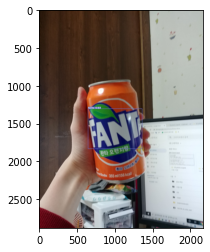

In [27]:
# 출력 결과물 : 이미지 & 음성파일
from IPython.display import Image, Audio
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

val_img_path =  '/content/yolov5/MyDrive/MyDrive/20210221_143226.jpg' # 예측하고 싶은 이미지의 경로 입력

!python 04.detect2.py --weights /content/yolov5/MyDrive/MyDrive/Colab/project01/yolov5_2s/best.pt --img 416 --conf 0.5 --source "{val_img_path}"   
                    # 생성된 가중치를 불러온다.                                             # 이미지 크기   # confidence    # 소스
Image(os.path.join('/content/yolov5/runs/detect/exp',os.path.basename(val_img_path)))

result = img.imread(os.path.join('/content/yolov5/runs/detect/exp',os.path.basename(val_img_path)))
plt.imshow(result)
plt.show()
time.sleep(5)

Audio('/content/yolov5/labelEN.mp3', rate=44100 ,autoplay=True)